<a href="https://colab.research.google.com/github/himanshira/Machine-Learning/blob/main/Building_an_Income_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement:

The Income Classification Machine Learning models classifies if the annual income of an individual is below or equal to 50,000 USD or above 50,000 USD.

Basis the model metrics we select the best performing model for our problem.

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
# Model Metrics

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder
# Save Model

import pickle

#Load Dataset

In [ ]:
income_census = pd.read_csv('/content/adultcensusincome.csv')
income_census

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K


# Exploratory Data Analysis

In [ ]:
income_census.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
sex,0
capital.gain,0


-

In [ ]:
income_census.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32561 non-null  int64 
 12  native.country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 17.9 MB


# Data imputation
- Replace ? with Unknown

In [ ]:
income_census['workclass'] = income_census['workclass'].replace('?', 'Unknown')
income_census['occupation'] = income_census['occupation'].replace('?', 'Unknown')
income_census['native-country'] = income_census['native.country'].replace('?', 'Unknown')
income_census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income,native-country
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,Female,0,4356,40,United-States,<=50K,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K,United-States
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Female,0,4356,40,United-States,<=50K,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K,United-States


# Univariate Analysis

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


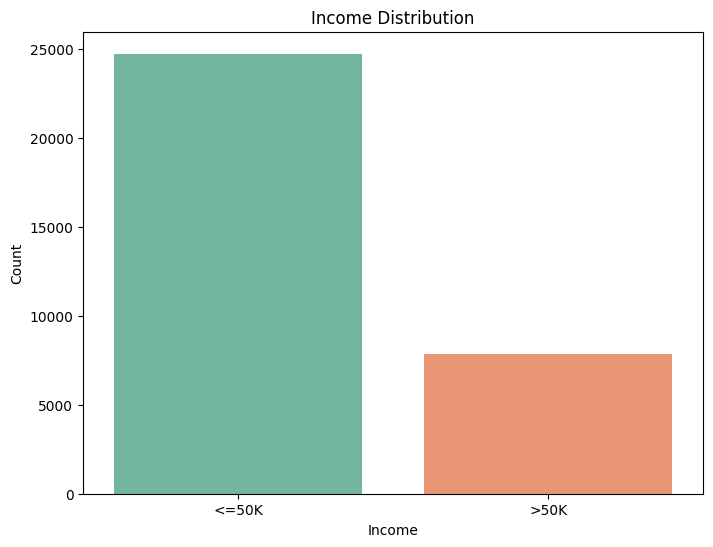

In [ ]:
# Income Distribution

income_distribution = income_census['income'].value_counts()
print(f"{income_distribution}")

# Plot the income distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=income_census, hue='income', palette='Set2')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

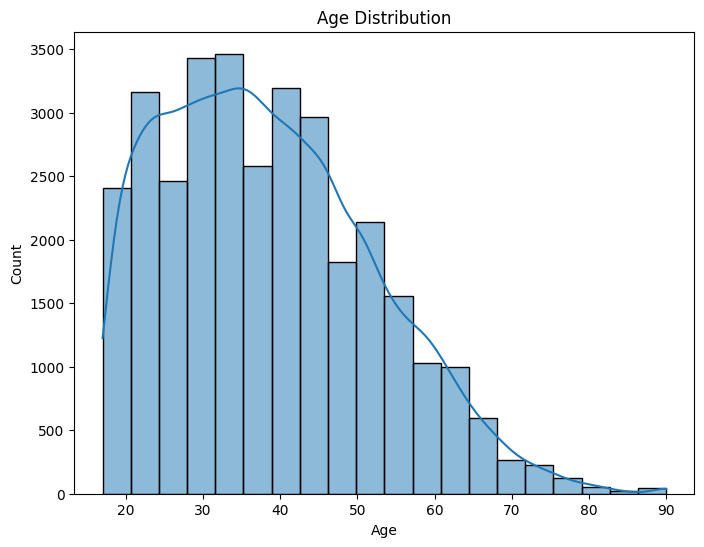

In [ ]:
# Age Distribution

plt.figure(figsize=(8, 6))
sns.histplot(income_census['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

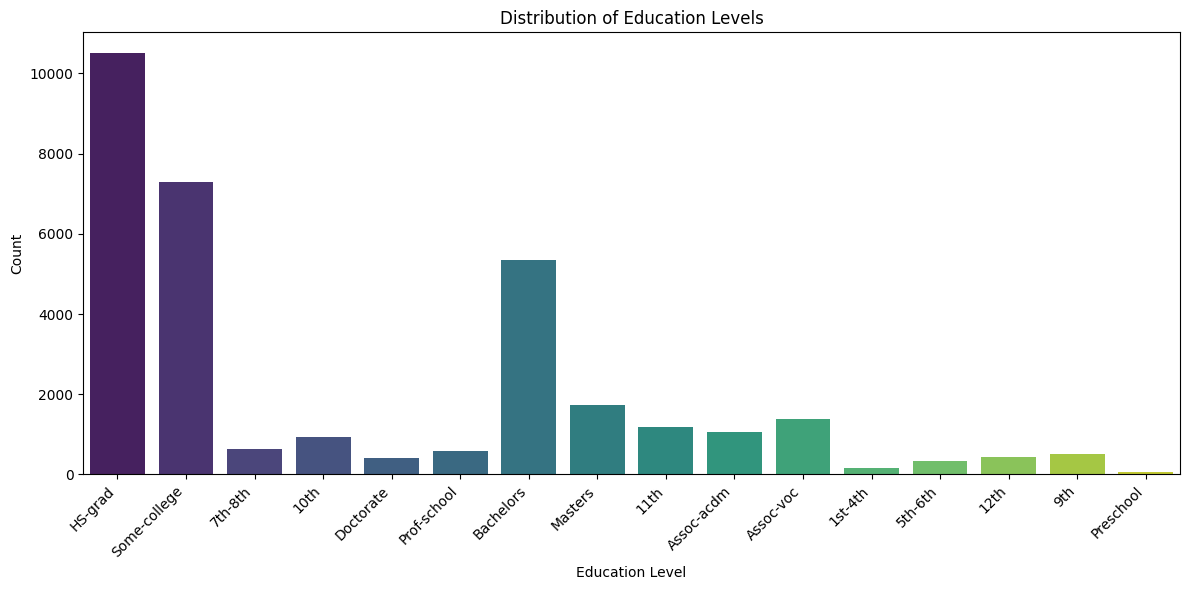

In [ ]:
# Education Levels

plt.figure(figsize=(12, 6))
sns.countplot(data=income_census, x='education', palette='viridis')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

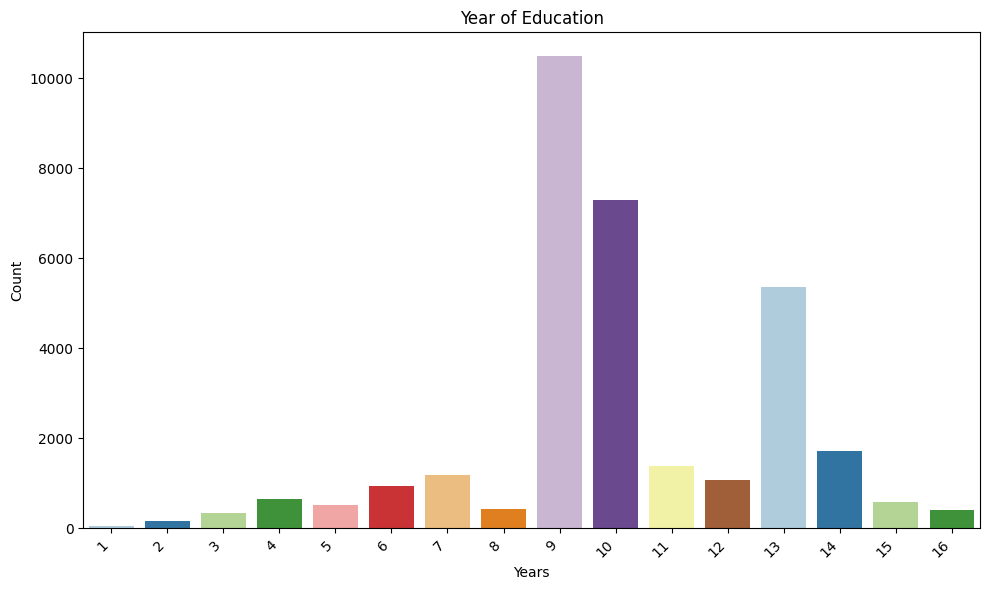

In [ ]:
# Years of Education

plt.figure(figsize=(10, 6))
sns.countplot(data=income_census, x='education.num', palette='Paired')
plt.title('Year of Education')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

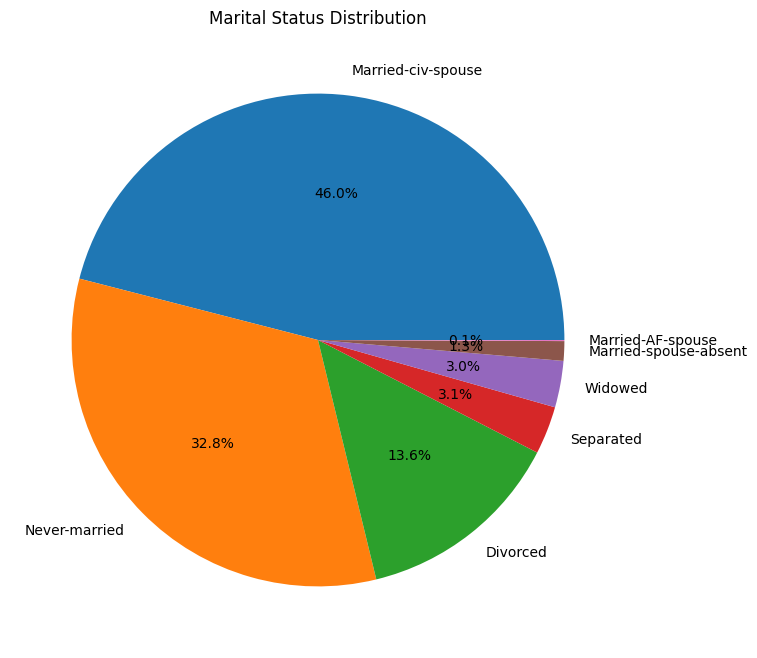

In [ ]:
# Marital Status Pie Chart

plt.figure(figsize=(8, 8))
plt.pie(income_census['marital.status'].value_counts(), labels=income_census['marital.status'].value_counts().index, autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.show()

# Perform the following Bivariate analysis

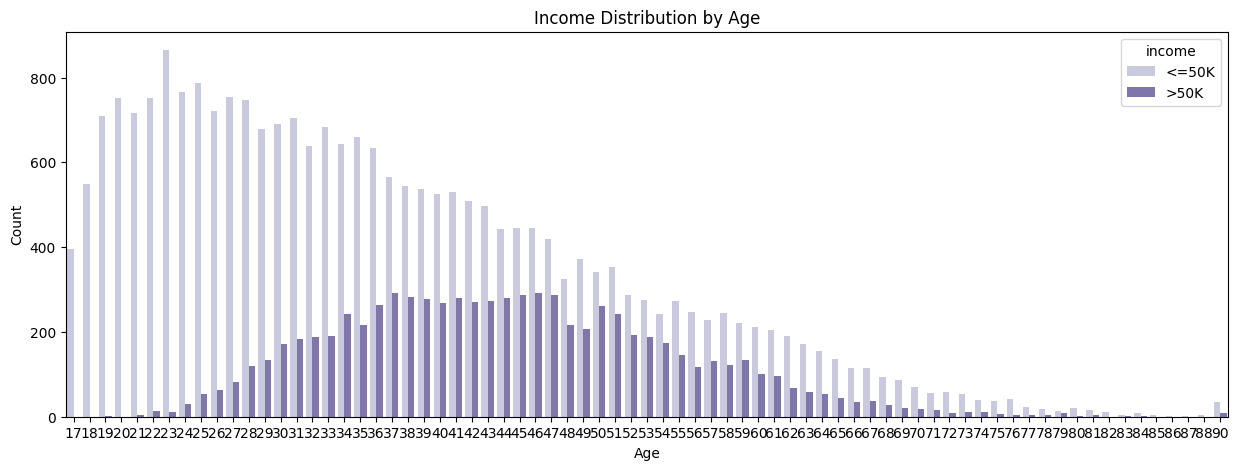

In [ ]:
# Create a countplot of income across columns age

plt.figure(figsize=(15, 5))
sns.countplot(data=income_census, x='age', hue='income', palette='Purples')
plt.title('Income Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

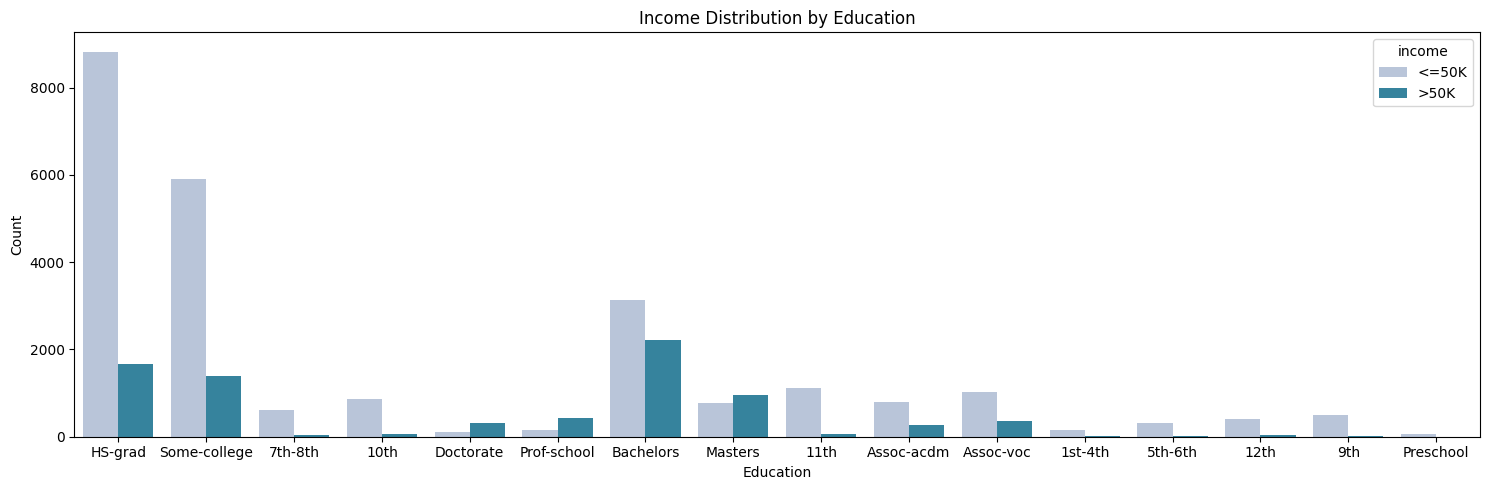

In [ ]:
# Create a countplot of income across column education

plt.figure(figsize=(15, 5))
sns.countplot(data=income_census, x='education', hue='income', palette="PuBuGn")
plt.title('Income Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

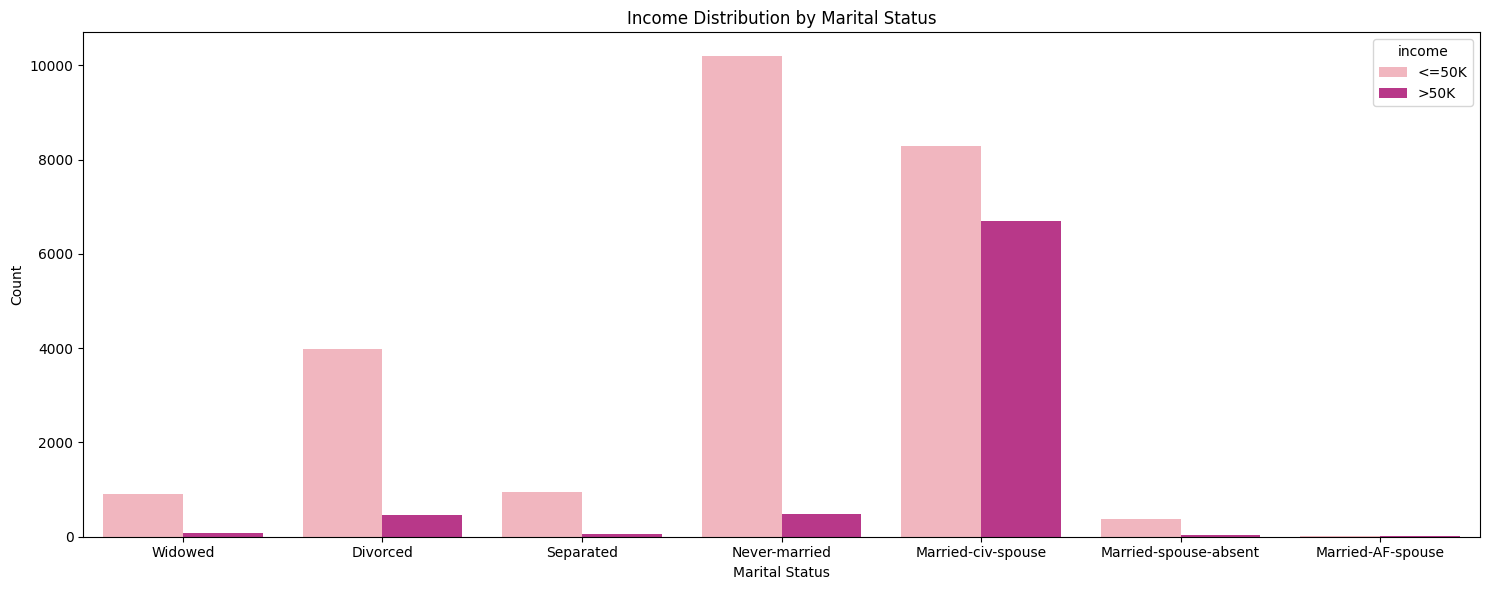

In [ ]:
# Create a countplot of income across column marital status

plt.figure(figsize=(15, 6))
sns.countplot(data=income_census, x='marital.status', hue='income', palette="RdPu")
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

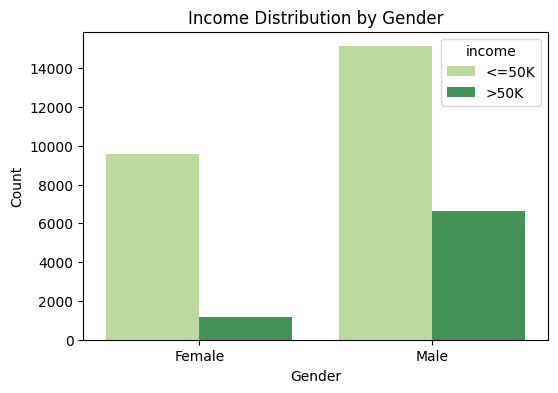

In [ ]:
# Create a countplot of income across column sex

plt.figure(figsize=(6, 4))
sns.countplot(data=income_census, x='sex', hue='income', palette="YlGn")
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Prepare the dataset for modeling

In [ ]:
income_census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income,native-country
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,Female,0,4356,40,United-States,<=50K,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K,United-States
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Female,0,4356,40,United-States,<=50K,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K,United-States


In [ ]:
# Drop native.country as it is a duplicate of native-country

income_census = income_census.drop(['native.country'], axis=1)

In [ ]:
from imblearn.pipeline import Pipeline
# Map target variable to numerical (0/1)
income_census['income_numeric'] = income_census['income'].map({'<=50K': 0, '>50K': 1})


# Define columns for preprocessing
num_col = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
cat_col = ['workclass', 'marital.status', 'occupation', 'relationship', 'sex', 'education', 'native-country']


train_df, test_df = train_test_split(
    income_census, test_size=0.2, random_state=42, stratify=income_census['income_numeric']
)

print(f"Train Data Shape: {train_df.shape}")
print(f"Test Data Shape: {test_df.shape}")

# Separate X and y for training and testing
X_train = train_df[num_col + cat_col]
y_train = train_df['income_numeric']

X_test = test_df[num_col + cat_col]
y_test = test_df['income_numeric']

print("\nClass distribution in y_train BEFORE SMOTE:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

# --- Define the preprocessing steps using ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col), # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_col) # One-hot encode categorical features
    ],
    remainder='passthrough' # Keep any other columns not specified (e.g., if there were IDs)
)

# --- Create the full pipeline including preprocessing, SMOTE, and classifier ---

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),          # Preprocess (scale numerical, OHE categorical)
    ('smote', SMOTE(random_state=42)),       # Apply SMOTE (ONLY on training data after preprocessing)
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
])

# --- Train the entire pipeline ---

print("\nTraining the model pipeline...")
model_pipeline.fit(X_train, y_train)
print("Model pipeline training complete.")

# --- Evaluate the model ---
print("\nEvaluating the model...")
y_pred = model_pipeline.predict(X_test)

print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# To verify what SMOTE does to the training data (not needed for main pipeline)
# X_train_transformed = preprocessor.fit_transform(X_train)
# sm = SMOTE(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X_train_transformed, y_train)
# print("\nClass distribution in y_train AFTER SMOTE (for verification):")
# print(pd.Series(y_resampled).value_counts())

Train Data Shape: (26048, 15)
Test Data Shape: (6513, 15)

Class distribution in y_train BEFORE SMOTE:
income_numeric
0    19775
1     6273
Name: count, dtype: int64
income_numeric
0    0.759175
1    0.240825
Name: proportion, dtype: float64

Training the model pipeline...
Model pipeline training complete.

Evaluating the model...

--- Model Evaluation ---
Accuracy: 0.8093044679871028
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86      4945
           1       0.57      0.83      0.68      1568

    accuracy                           0.81      6513
   macro avg       0.75      0.82      0.77      6513
weighted avg       0.85      0.81      0.82      6513



# Logistic Regression

In [ ]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
])

print("\n--- Training Logistic Regression ---")
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



--- Training Logistic Regression ---
Logistic Regression Accuracy: 0.8093044679871028
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4945
           1       0.57      0.83      0.68      1568

    accuracy                           0.81      6513
   macro avg       0.75      0.82      0.77      6513
weighted avg       0.85      0.81      0.82      6513



#Decision Tree Classifier Pipeline

In [ ]:
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(max_depth = 42,random_state=42))
])

print("\n--- Training Decision Tree Classifier ---")
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


--- Training Decision Tree Classifier ---
Decision Tree Classifier Accuracy: 0.8063872255489022
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4945
           1       0.59      0.64      0.61      1568

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.74      6513
weighted avg       0.81      0.81      0.81      6513



#  KNN Classifier Model

In [ ]:
from sklearn.model_selection import cross_validate

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

cv_results = cross_validate(pipeline_knn, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

print("\tCross Validation (KNN):\n")
for metric_name, values in cv_results.items():
  print(f"{metric_name.replace('test_', '').replace('-', '').title()}:"
  f"Mean={np.mean(values):.4f}, std={np.std(values):.4f}")

print("\n--- Training KNN Classifier ---")
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)

print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_knn))

	Cross Validation (KNN):

Fit_Time:Mean=0.6311, std=0.0956
Score_Time:Mean=2.3320, std=0.3279
Score:Mean=0.7830, std=0.0025

--- Training KNN Classifier ---
KNN Classifier Accuracy: 0.7825886688162137
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.92      0.78      0.85      4945
           1       0.53      0.79      0.64      1568

    accuracy                           0.78      6513
   macro avg       0.73      0.78      0.74      6513
weighted avg       0.83      0.78      0.79      6513



#SVM Classifier

In [ ]:
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(random_state=42))
])

print("\n--- Training SVM Classifier ---")
pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)

print("SVM Classifier Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


--- Training SVM Classifier ---
SVM Classifier Accuracy: 0.8102257024412713
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      4945
           1       0.57      0.83      0.68      1568

    accuracy                           0.81      6513
   macro avg       0.76      0.82      0.77      6513
weighted avg       0.85      0.81      0.82      6513



#Naive Bayes Classifier

In [ ]:
pipeline_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GaussianNB())
])

print("\n--- Training Naive Bayes Classifier ---")
pipeline_nb.fit(X_train, y_train)
y_pred_nb = pipeline_nb.predict(X_test)

print("Naive Bayes Classifier Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


--- Training Naive Bayes Classifier ---
Naive Bayes Classifier Accuracy: 0.5475203439275296
              precision    recall  f1-score   support

           0       0.95      0.43      0.59      4945
           1       0.34      0.93      0.50      1568

    accuracy                           0.55      6513
   macro avg       0.64      0.68      0.54      6513
weighted avg       0.80      0.55      0.57      6513



#  Random Forest Classifier

In [ ]:
pipeline_rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

print("\n--- Training Random Forest Classifier ---")
pipeline_rfc.fit(X_train, y_train)
y_pred_rfc = pipeline_rfc.predict(X_test)

print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))


--- Training Random Forest Classifier ---
Random Forest Classifier Accuracy: 0.8436972209427299
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4945
           1       0.67      0.69      0.68      1568

    accuracy                           0.84      6513
   macro avg       0.79      0.79      0.79      6513
weighted avg       0.85      0.84      0.84      6513



# Perform model evaluation on Accuracy and F1 score and identify the best model

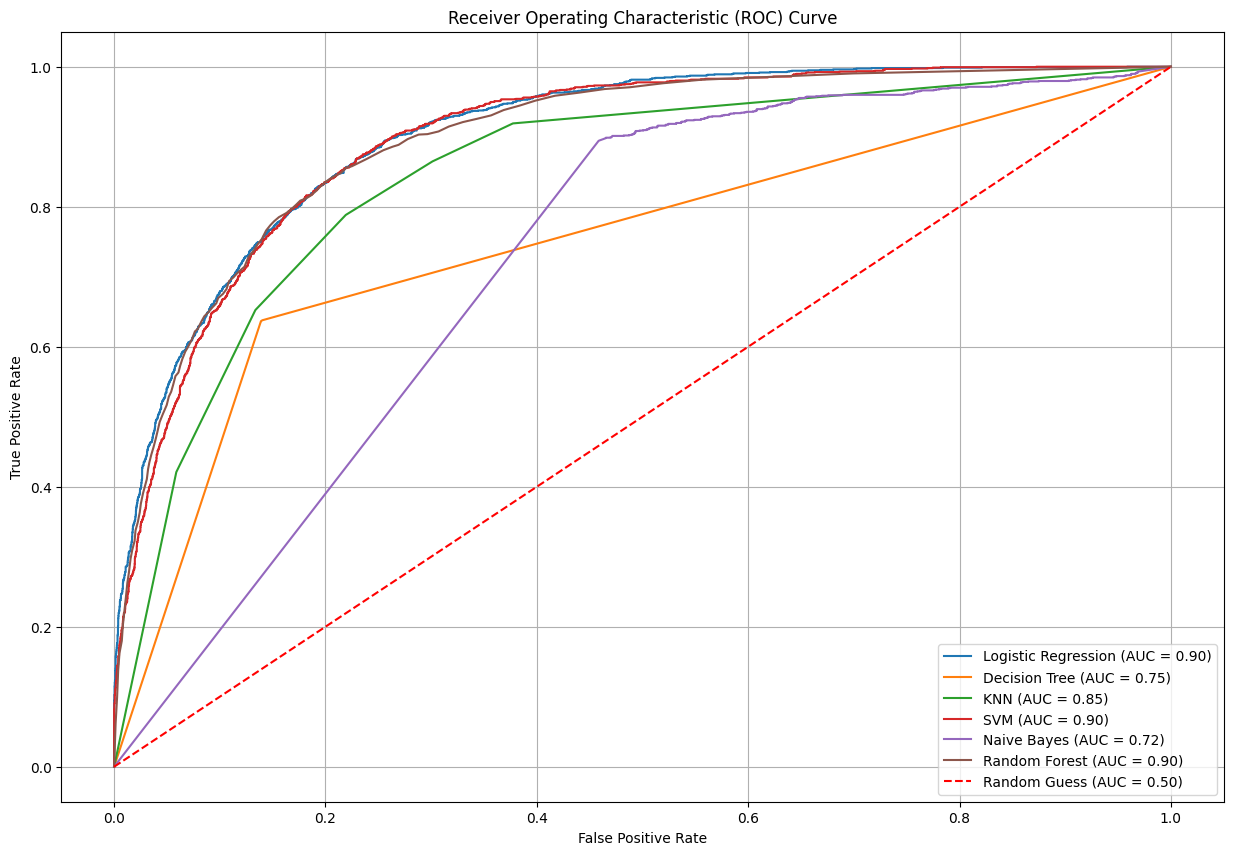

In [ ]:
y_scores_lr = pipeline_lr.predict_proba(X_test)[:, 1]
y_scores_dt = pipeline_dt.predict_proba(X_test)[:, 1]
y_scores_knn = pipeline_knn.predict_proba(X_test)[:, 1]
y_scores_nb = pipeline_nb.predict_proba(X_test)[:, 1]
y_scores_rfc = pipeline_rfc.predict_proba(X_test)[:, 1]

y_scores_svm = pipeline_svm.decision_function(X_test)

# --- Calculate AUC scores and ROC curves using probability scores ---
auc_log_reg = roc_auc_score(y_test, y_scores_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr) # Use _ for thresholds as they're not plotted

auc_dec_tree = roc_auc_score(y_test, y_scores_dt)
fpr_dec_tree, tpr_dec_tree, _ = roc_curve(y_test, y_scores_dt)

auc_knn = roc_auc_score(y_test, y_scores_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)

auc_svm = roc_auc_score(y_test, y_scores_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)

auc_nb = roc_auc_score(y_test, y_scores_nb)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_scores_nb)

auc_rfc = roc_auc_score(y_test, y_scores_rfc)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_scores_rfc)


# --- Plot ROC curves ---
plt.figure(figsize=(15, 10))

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_dec_tree, tpr_dec_tree, label=f'Decision Tree (AUC = {auc_dec_tree:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {auc_rfc:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

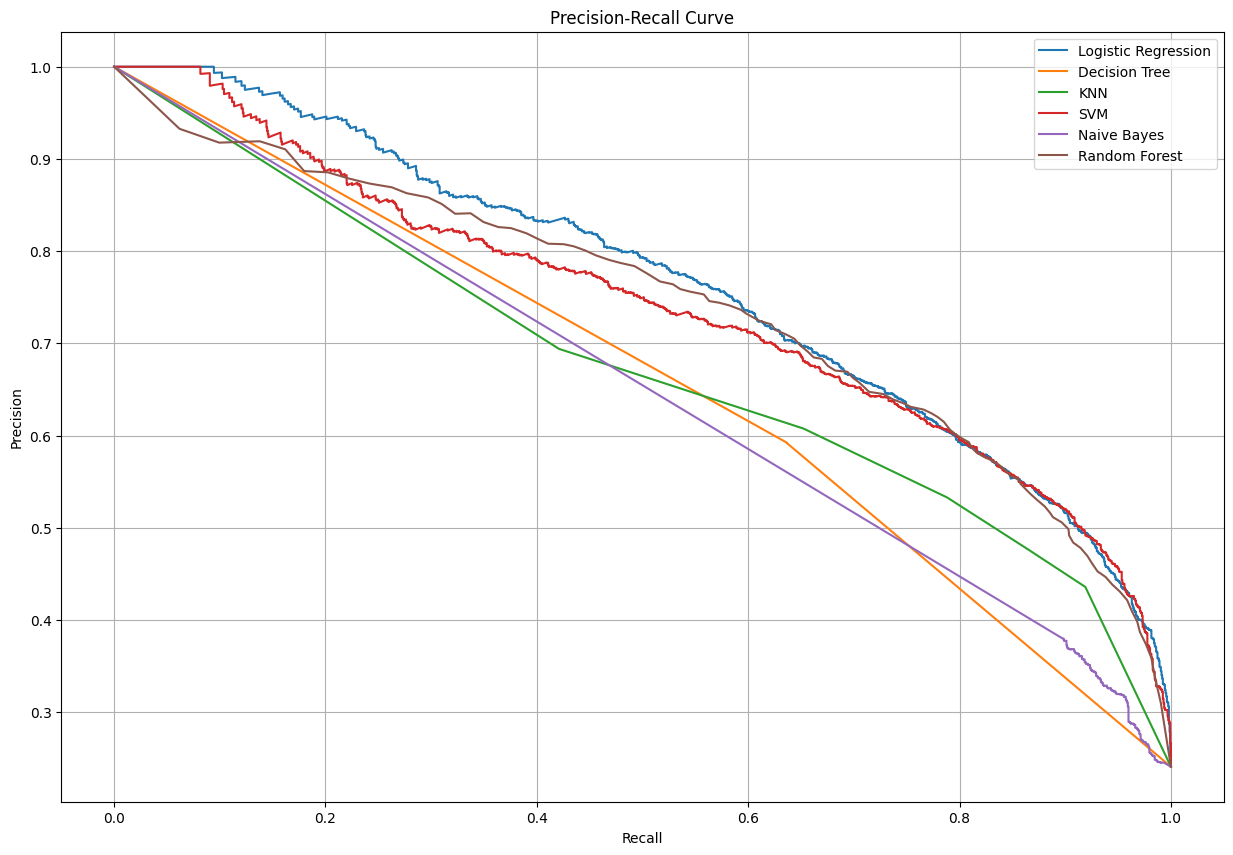

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
# Ensure your pipelines are named consistently, e.g., pipeline_lr, pipeline_dt, etc.
# And ensure these pipelines have been fitted to X_train, y_train.

# Get probability predictions for the positive class (class 1)
# You need to call .predict_proba() on your *fitted* pipelines on X_test.
# For SVC, you need to ensure probability=True when initializing the SVC in the pipeline.

# Example for Logistic Regression (adjust for other models)
# y_pred_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]
# For SVM, if probability=True was set:
# y_pred_proba_svm = pipeline_svm.predict_proba(X_test)[:, 1]
# If SVM's probability=False (default for SVC), use decision_function:
# y_scores_svm = pipeline_svm.decision_function(X_test) # Decision function scores

# Assuming your pipelines are already defined and fitted, e.g.:
# pipeline_lr, pipeline_dt, pipeline_knn, pipeline_svm, pipeline_nb, pipeline_rfc

# --- Get probability scores for the positive class (class 1) ---
# For models that provide probabilities:
y_scores_lr = pipeline_lr.predict_proba(X_test)[:, 1]
y_scores_dt = pipeline_dt.predict_proba(X_test)[:, 1]
y_scores_knn = pipeline_knn.predict_proba(X_test)[:, 1]
y_scores_nb = pipeline_nb.predict_proba(X_test)[:, 1]
y_scores_rfc = pipeline_rfc.predict_proba(X_test)[:, 1]


y_scores_svm = pipeline_svm.decision_function(X_test)


# --- Calculate Precision-Recall curves using probability scores ---
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_scores_lr)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_scores_dt)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_scores_knn)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_scores_svm)
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_scores_nb)
precision_rfc, recall_rfc, _ = precision_recall_curve(y_test, y_scores_rfc)



# --- Plot precision and recall curves ---

plt.figure(figsize=(15, 10))
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.plot(recall_dt, precision_dt, label='Decision Tree')
plt.plot(recall_knn, precision_knn, label='KNN')
plt.plot(recall_svm, precision_svm, label='SVM')
plt.plot(recall_nb, precision_nb, label='Naive Bayes')
plt.plot(recall_rfc, precision_rfc, label='Random Forest')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True) # Add grid for better readability
plt.show()

# Logistic Regression Hyperparameter Tuning

In [ ]:
# Logistic Regression Hyperparameter Tunning using Grid SearchCV
lr_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

grid_lr = {}

grid_lr['classifier__C'] = np.arange(0.1, 1.1, 0.1)


grid_search_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=grid_lr,
    cv=lr_cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

print("\n--- Starting Logistic Regression Hyperparameter Tuning with GridSearchCV ---")
grid_result_lr = grid_search_lr.fit(X_train, y_train)
print("Hyperparameter tuning complete.")

# Best Logistic Regression Model

print(f"Best parameters found for Logistic Regression: {grid_result_lr.best_params_}")

best_model_lr = grid_result_lr.best_estimator_
y_pred_lr_best = best_model_lr.predict(X_test)


--- Starting Logistic Regression Hyperparameter Tuning with GridSearchCV ---
Fitting 30 folds for each of 10 candidates, totalling 300 fits
Hyperparameter tuning complete.
Best parameters found for Logistic Regression: {'classifier__C': np.float64(0.9)}


# KNN Hyperparameter Tuning

In [ ]:
# Using GridSearchCV with Cross-Validation to find optimal 'k'

param_grid = {'classifier__n_neighbors' : np.arange(1, 21)}

grid_search_knn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("\n--- Starting KNN Hyperparameter Tuning with GridSearchCV ---")
grid_results_knn = grid_search_knn.fit(X_train, y_train)
print("Hyperparameter tuning complete.")

# Best KNN Model

print(f"Best paramaters for KNN: {grid_results_knn.best_params_}")

best_model_knn = grid_results_knn.best_estimator_
y_pred_knn_best = best_model_knn.predict(X_test)



--- Starting KNN Hyperparameter Tuning with GridSearchCV ---
Hyperparameter tuning complete.
Best paramaters for KNN: {'classifier__n_neighbors': np.int64(2)}


# Decision Tree Hyperparameter Tuning

In [ ]:
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__ccp_alpha': [0.0, 0.01, 0.1]
}

grid_search_dt = GridSearchCV(
    estimator=pipeline_dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("\n--- Starting Hyperparameter Tuning using GridSearchCV --")
grid_results_dt = grid_search_dt.fit(X_train, y_train)
print("Hyperparameter tuning complete.")

# Best Model

print(f"Best parameters found for Decision Tree: {grid_results_dt.best_params_}")

best_model_dt = grid_results_dt.best_estimator_
y_pred_dt_best = best_model_dt.predict(X_test)


--- Starting Hyperparameter Tuning using GridSearchCV --
Hyperparameter tuning complete.
Best parameters found for Decision Tree: {'classifier__ccp_alpha': 0.0, 'classifier__max_depth': None, 'classifier__max_features': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}


# Naives Bayes Hyperparameter Tuning

In [ ]:
cv_nb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search_nb = GridSearchCV(
    estimator=pipeline_nb,
    param_grid=param_grid,
    cv=cv_nb,
    scoring='accuracy',
    n_jobs=-1
)

print("\n--- Starting Naives Bayes Hyperparameter Tuning using GridSearchCV---")
grid_results_nb = grid_search_nb.fit(X_train, y_train)
print("Hyperparameter tuning complete.")

# Best Model

print(f"Best paramaters found for for Naives Bayes: {grid_results_nb.best_params_}")
best_model_nb = grid_results_nb.best_estimator_
y_pred_nb_best = best_model_nb.predict(X_test)


--- Starting Naives Bayes Hyperparameter Tuning using GridSearchCV---
Hyperparameter tuning complete.
Best paramaters found for for Naives Bayes: {'classifier__var_smoothing': 1e-05}


# Random Forest Classifier Hyperparameter Tuning

In [ ]:
param_grid = {
    'classifier__n_estimators': [150, 250],
    'classifier__max_depth': [15, 25],
    'classifier__min_samples_split': [3],
    'classifier__min_samples_leaf': [5],
    'classifier__criterion': ['gini']
}

from tqdm import tqdm

grid_search_rfc = GridSearchCV(
    estimator=pipeline_rfc,
    param_grid=param_grid,
    cv=5,
    scoring={'accuracy': 'accuracy', 'f1_score': 'f1', 'roc_auc': 'roc_auc'},
    refit='f1_score',
    n_jobs=-1,
    verbose=2
)

print("\n--- Starting Random Forest Hyperparameter Tuning with GridSearchCV ---")
grid_results_rfc = grid_search_rfc.fit(X_train, y_train)
print("Hyperparameter tuning complete.")

# Best Random Forest Model
print("\nBest parameters found: ", grid_results_rfc.best_params_)
print("Best cross-validation score (f1/accuracy based on scoring): {:.4f}".format(grid_results_rfc.best_score_))

# The best trained pipeline

best_model_rfc = grid_results_rfc.best_estimator_
y_pred_rfc_best = best_model_rfc.predict(X_test)



--- Starting Random Forest Hyperparameter Tuning with GridSearchCV ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Hyperparameter tuning complete.

Best parameters found:  {'classifier__criterion': 'gini', 'classifier__max_depth': 25, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 250}
Best cross-validation score (f1/accuracy based on scoring): 0.6998


# SVM Hypterparameter Tuning

In [ ]:
# SVM Hyperparamter Tuning using GridSearchCV

param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale']
}

grid_results_svm = GridSearchCV(
    estimator=pipeline_svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

print("\n--- Starting SVM Hyperparameter Tuning with GridSearchCV ---")
grid_results_svm = grid_results_svm.fit(X_train, y_train)
print("Hyperparameter tuning complete.")

# Best Model for SVM

print(f"Best parameters found for SVM: {grid_results_svm.best_params_}")

best_model_svm = grid_results_svm.best_estimator_
y_pred_svm_best = best_model_svm.predict(X_test)



--- Starting SVM Hyperparameter Tuning with GridSearchCV ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Hyperparameter tuning complete.
Best parameters found for SVM: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}


# Compare the accuracy, f1_score, precision and recall for the hyperparameter tuned models

In [ ]:
ht_log_accuracy = accuracy_score(y_test, y_pred_lr_best)
ht_log_f1_score = f1_score(y_test, y_pred_lr_best)
ht_log_precision = precision_score(y_test, y_pred_lr_best)
ht_log_recall = recall_score(y_test, y_pred_lr_best)

ht_dec_tree_accuracy = accuracy_score(y_test, y_pred_dt_best)
ht_dec_tree_f1_score = f1_score(y_test, y_pred_dt_best)
ht_dec_tree_precision = precision_score(y_test, y_pred_dt_best)
ht_dec_tree_recall = recall_score(y_test, y_pred_dt_best)

ht_knn_accuracy = accuracy_score(y_test, y_pred_knn_best)
ht_knn_f1_score = f1_score(y_test, y_pred_knn_best)
ht_knn_precision = precision_score(y_test, y_pred_knn_best)
ht_knn_recall = recall_score(y_test, y_pred_knn_best)

ht_svm_accuracy = accuracy_score(y_test, y_pred_svm_best)
ht_svm_f1_score = f1_score(y_test, y_pred_svm_best)
ht_svm_precision = precision_score(y_test, y_pred_svm_best)
ht_svm_recall = recall_score(y_test, y_pred_svm_best)

ht_nb_accuracy = accuracy_score(y_test, y_pred_nb_best)
ht_nb_f1_score = f1_score(y_test, y_pred_nb_best)
ht_nb_precision = precision_score(y_test, y_pred_nb_best)
ht_nb_recall = recall_score(y_test, y_pred_nb)

ht_rfc_accuracy = accuracy_score(y_test, y_pred_rfc_best)
ht_rfc_f1_score = f1_score(y_test, y_pred_rfc_best)
ht_rfc_precision = precision_score(y_test, y_pred_rfc_best)
ht_rfc_recall = recall_score(y_test, y_pred_rfc_best)

print("--- Hyperparameter Tuning Results ---")
print("Logistic Regression:")
print(f"Accuracy: {ht_log_accuracy:.4f}")
print(f"F1 Score: {ht_log_f1_score:.4f}")
print(f"Precision: {ht_log_precision:.4f}")
print(f"Recall: {ht_log_recall:.4f}")

print("\nDecision Tree:")
print(f"Accuracy: {ht_dec_tree_accuracy:.4f}")
print(f"F1 Score: {ht_dec_tree_f1_score:.4f}")
print(f"Precision: {ht_dec_tree_precision:.4f}")
print(f"Recall: {ht_dec_tree_recall:.4f}")

print("\nKNN:")
print(f"Accuracy: {ht_knn_accuracy:.4f}")
print(f"F1 Score: {ht_knn_f1_score:.4f}")
print(f"Precision: {ht_knn_precision:.4f}")
print(f"Recall: {ht_knn_recall:.4f}")

print("\nSupport Vector Machine:")
print(f"Accuracy: {ht_svm_accuracy:.4f}")
print(f"F1 Score: {ht_svm_f1_score:.4f}")
print(f"Precision: {ht_svm_precision:.4f}")
print(f"Recall: {ht_svm_recall:.4f}")

print("\nNaive Bayes:")
print(f"Accuracy: {ht_nb_accuracy:.4f}")
print(f"F1 Score: {ht_nb_f1_score:.4f}")
print(f"Precision: {ht_nb_precision:.4f}")
print(f"Recall: {ht_nb_recall:.4f}")

print("\nRandom Forest:")
print(f"Accuracy: {ht_rfc_accuracy:.4f}")
print(f"F1 Score: {ht_rfc_f1_score:.4f}")
print(f"Precision: {ht_rfc_precision:.4f}")
print(f"Recall: {ht_rfc_recall:.4f}")
#

--- Hyperparameter Tuning Results ---
Logistic Regression:
Accuracy: 0.8092
F1 Score: 0.6771
Precision: 0.5712
Recall: 0.8310

Decision Tree:
Accuracy: 0.8151
F1 Score: 0.6228
Precision: 0.6121
Recall: 0.6339

KNN:
Accuracy: 0.8075
F1 Score: 0.5907
Precision: 0.6049
Recall: 0.5772

Support Vector Machine:
Accuracy: 0.8092
F1 Score: 0.6647
Precision: 0.5760
Recall: 0.7857

Naive Bayes:
Accuracy: 0.6166
F1 Score: 0.5309
Precision: 0.3763
Recall: 0.9292

Random Forest:
Accuracy: 0.8242
F1 Score: 0.6898
Precision: 0.5996
Recall: 0.8119


In [ ]:
# Create a DataFrame of Recall, F1Score, Precision and Accuracy

data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [ht_log_accuracy, ht_dec_tree_accuracy, ht_knn_accuracy, ht_svm_accuracy, ht_nb_accuracy, ht_rfc_accuracy],
    'F1 Score': [ht_log_f1_score, ht_dec_tree_f1_score, ht_knn_f1_score, ht_svm_f1_score, ht_nb_f1_score, ht_rfc_f1_score],
    'Precision': [ht_log_precision, ht_dec_tree_precision, ht_knn_precision, ht_svm_precision, ht_nb_precision, ht_rfc_precision],
    'Recall':[ ht_log_recall, ht_dec_tree_recall, ht_knn_recall, ht_svm_recall, ht_nb_recall, ht_rfc_recall]
}

df = pd.DataFrame(data)
df

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.809151,0.677059,0.571241,0.830995
1,Decision Tree,0.815139,0.622807,0.612069,0.633929
2,KNN,0.807462,0.590731,0.604947,0.577168
3,SVM,0.809151,0.664688,0.575970,0.785714
4,Naive Bayes,0.616613,0.530904,0.376298,0.929209
5,Random Forest,0.824198,0.689786,0.599623,0.811862


# Save Model using pickle

In [ ]:
filename = 'randomforestmodel.pkl'

best_model_rfc = grid_results_rfc.best_estimator_

with open(filename, 'wb') as file:
  pickle.dump(best_model_rfc, file)